In [2]:
#needed to make web requests
import requests

#store the data we get as a dataframe
import pandas as pd

#convert the response as a strcuctured json
import json

#mathematical operations on lists
import numpy as np

#parse the datetimes we get from NOAA
from datetime import datetime

#add the access token you got from NOAA
token = 'XXX'

# Station
station_id = 'GHCND:US1CAMR0037'

In [8]:
#initialize lists to store data
dates_temp = []
dates_prcp = []
temps = []
minT = []
maxT = []
prcp = []

#for each year from 2019-2020 ...
for year in range(2019, 2020):
    year = str(year)
    print('working on year '+year)
    
    #make the api call
    r = requests.get('https://www.ncdc.noaa.gov/cdo-web/api/v2/data?datasetid=GHCND&datatypeid=TAVG&datatypeid=TMAX&limit=1000&stationid='+station_id+'&startdate='+year+'-01-01&enddate='+year+'-12-31', headers={'token':token})
    r2 = requests.get('https://www.ncdc.noaa.gov/cdo-web/api/v2/data?datasetid=GHCND&datatypeid=TMIN&datatypeid=PRCP&limit=1000&stationid='+station_id+'&startdate='+year+'-01-01&enddate='+year+'-12-31', headers={'token':token})

    #load the api response as a json
    d = json.loads(r.text)
    d2 = json.loads(r2.text)

    #get all items in the response which are average temperature readings
    avg_temps = [item for item in d['results'] if item['datatype']=='TAVG']
    min_temps = [item for item in d2['results'] if item['datatype']=='TMIN']
    max_temps = [item for item in d['results'] if item['datatype']=='TMAX']
    precp = [item for item in d2['results'] if item['datatype']=='PRCP']

    dates_temp += [item['date'] for item in avg_temps]
    #get the actual average temperature from all average temperature readings
    temps += [item['value'] for item in avg_temps]
    minT += [item['value'] for item in min_temps]
    maxT += [item['value'] for item in max_temps]
    prcp += [item['value'] for item in precp]


working on year 2019


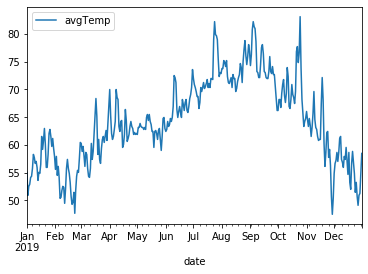

In [9]:
#initialize dataframe
df_temp = pd.DataFrame()

#populate date and average temperature fields (cast string date to datetime and convert temperature from tenths of Celsius to Fahrenheit)
df_temp['date'] = [datetime.strptime(d, "%Y-%m-%dT%H:%M:%S") for d in dates_temp]
df_temp['avgTemp'] = [float(v)/10.0*1.8 + 32 for v in temps]
df_temp['minTemp'] = [float(v)/10.0*1.8 + 32 for v in minT]
df_temp['maxTemp'] = [float(v)/10.0*1.8 + 32 for v in maxT]
# Convert mm/day to inch/day
df_temp['prcp'] = [float(v)/25.54 for v in prcp]

df_temp.head()

df_temp.plot(kind='line',x='date',y='avgTemp')